In [1]:
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os, gzip, cPickle, sys

#############################################
# Drawing function...
#############################################
def fancy_box(bp):
    ## change outline color, fill color and linewidth of the boxes
    for box in bp['boxes']:
        # change outline color
        box.set( color='#068C7F', linewidth=4, alpha=.9)
        # change fill color
        box.set( facecolor = '#8cbbea', alpha=.9)

    ## change color and linewidth of the whiskers
    for whisker in bp['whiskers']:
        whisker.set(color='#068c7f', linewidth=3)

    ## change color and linewidth of the caps
    for cap in bp['caps']:
        cap.set(color='#068C7F', linewidth=3)

    ## change color and linewidth of the medians
    for median in bp['medians']:
        median.set(color='#206584', linewidth=4)

    ## change color and linewidth of the means
    for median in bp['means']:
        median.set(color='#000000', linewidth=4, alpha=.8)

    ## change the style of fliers and their fill
    for flier in bp['fliers']:
        flier.set(marker='o', color='#39d5f1', alpha=0.8)

#############################################


from matplotlib import rc
rc('font', family = 'serif', serif = 'Times')
rc('text', usetex = True)

import seaborn as sns
sns.set_style("white", {'grid.color': '.0', 'grid.linestyle': '',\
                            'axes.grid': True,\
                            'xtick.direction': 'in',\
                            'xtick.major.size': 10,\
                            'xtick.minor.size': 10,\
                            'ytick.direction': 'in',\
                            'ytick.major.size': 10,\
                            'ytick.minor.size': 10,\
                            'xtick.label.size': 30})

from matplotlib import rc
rc('font', family = 'serif', serif = 'Times')
rc('text', usetex = True)


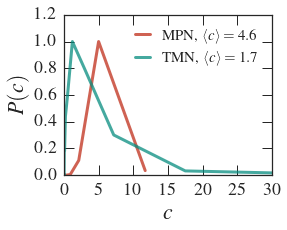

In [3]:
RootF = '/home/ubi/DATA_PhD/TVN-ST/py/out/Calcolo/Auto_bins/'

AVG_C = {}
Bins = {}
Freq = {}

plt.figure(figsize=(4.1,3.3))


colors=['#206584', '#BF2D19', '#068C7F']

Diz={'TWT':'TMN','MPC':'MPN',\
     'PRA':'PRA','PRB':'PRB','PRC':'PRC','PRD':'PRD','PRE':'PRE','PRL':'PRL'}
DATA = {}
cind=0
for ii, dn in enumerate(sorted(os.listdir(RootF))):
    
    DATA.setdefault(dn, {})
    
    fn = os.path.join(os.path.join(RootF,dn), '00/chi_square/P_c.dat')
    f=gzip.open(fn)
    DATA[dn]['Bins'] = cPickle.load(f)
    DATA[dn]['Freq'] = cPickle.load(f)
    DATA[dn]['AvgC'] = cPickle.load(f)
    try:
        junk = cPickle.load(f)
        DATA[dn]['CSTs'] = cPickle.load(f)
        DATA[dn]['POPs'] = cPickle.load(f)
    except:
        print 'Error in dir ', dn
    f.close()
    
    if dn in ['TWT','MPC'] and os.path.isdir(os.path.join(RootF,dn)):
        
        Bins[dn] = DATA[dn]['Bins']
        Freq[dn] = DATA[dn]['Freq']
        AVG_C[dn]= DATA[dn]['AvgC']
        
        cind += 1
        plt.plot(Bins[dn], Freq[dn]/Freq[dn].max(), '-',\
                 label=r'%s, $\langle c\rangle = %.01f$'%(Diz[dn],AVG_C[dn]),\
                 c=colors[cind%len(colors)], lw=3, alpha=.75)
        #plt.plot([AVG_C[dn]]*2, [.99,1.01], '-', lw=5,\
        #         c=colors[ii%len(colors)], alpha=.8)

plt.legend(loc=1, fontsize=15, handlelength=1.)
plt.xlim(0,30)
plt.ylim(0,1.2)

plt.xticks(size=18)
plt.yticks(size=18)

plt.xlabel(r'$c$', size=22)
plt.ylabel(r'$P(c)$', size=22)
        
plt.tight_layout()
plt.savefig('Pc.pdf', bbox_inches='tight')

In [4]:
plt.close()

MPC 4.62141414257
PRA 1.54375208768
PRB 0.789367983277
PRD 2.30024186847
PRE 2.4071722357
PRL 1.60206264236
TWT 1.70890529925


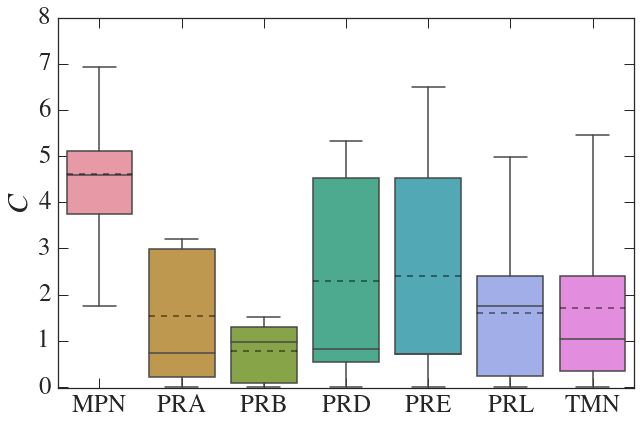

In [7]:
mybox = plt.figure(figsize=(9,6))
boxax = mybox.add_subplot(1,1,1)

NREP = 100000

Consts_Box = np.zeros((NREP, len(DATA.keys())))
Labels = []
for ii, k in enumerate(sorted(DATA.keys())):
    v = DATA[k]
    NPOP = float(v['POPs'].sum())
    C_s = [[v['CSTs'][i]]*np.ceil(NREP*v['POPs'][i]/NPOP)\
           for i in range(len(v['POPs']))]
    C_s = [it for subl in C_s for it in subl]
    
    C_s = C_s[:NREP]
    
    Consts_Box[:, ii] = np.asarray(C_s)
    print k, np.mean(C_s)
    Labels.append(Diz[k])#+'\n'+r'$%.02f$' % v['AvgC'])
    
bp = sns.boxplot(Consts_Box, names=Labels, showfliers=False, showmeans=True, meanline=True,\
    meanprops={'color': 'k', 'linestyle':'--', 'alpha': .5, 'lw': 1.75})

#fancy_box(boxax)

plt.xticks(size=25)
plt.yticks(size=25)
plt.ylabel(r'$C$', size=30)


ytop = plt.gca().get_ylim()[1]
plt.ylim(-.01, ytop+1.)
plt.tight_layout()
plt.savefig('Pc_BOX.pdf', bbox_inches='tight')

1.35778276037


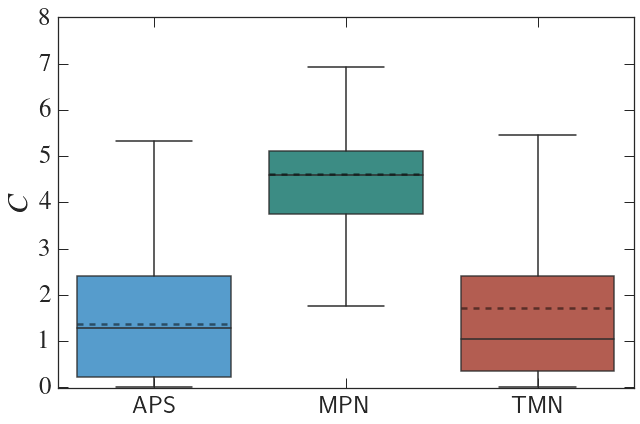

In [11]:
plt.close()

sns = reload(sns)
sns.set_style("white", {'grid.color': '.0', 'grid.linestyle': '',\
                            'axes.grid': True,\
                            'xtick.direction': 'in',\
                            'xtick.major.size': 10,\
                            'xtick.minor.size': 10,\
                            'ytick.direction': 'in',\
                            'ytick.major.size': 10,\
                            'ytick.minor.size': 10,\
                            'xtick.label.size': 30})

flatui = ["#1A91E2", "#068C7F", "#BF2D19"]

mybox = plt.figure(figsize=(9,6))
boxax = mybox.add_subplot(1,1,1)

NREP = 1000000

Consts_Box = np.zeros((NREP, 3))


Labels = []
for ii, k in enumerate(sorted(['TWT', 'MPC'])):
    v = DATA[k]
    NPOP = float(v['POPs'].sum())
    C_s = [[v['CSTs'][i]]*np.ceil(NREP*v['POPs'][i]/NPOP)\
           for i in range(len(v['POPs']))]
    C_s = [it for subl in C_s for it in subl]
    
    C_s = C_s[:NREP]
    
    Consts_Box[:, ii+1] = np.asarray(C_s)
    Labels.append(Diz[k])#+'\n'+r'$%.02f$' % v['AvgC'])

# Now count the total for the APS dataset...
APS = ['PRA', 'PRB', 'PRD', 'PRE', 'PRL']
POPAPS = sum([sum(DATA[k]['POPs']) for k in APS])
CSAPS = [[DATA[k]['CSTs'][i]]*np.ceil(NREP*float(DATA[k]['POPs'][i])/float(POPAPS))\
         for k in APS for i in range(len(DATA[k]['POPs']))]
CSAPS = [it for subl in CSAPS for it in subl]
CSAPS = CSAPS[:NREP]
Consts_Box[:, 0] = np.asarray(CSAPS)
Labels.insert(0, 'APS')

print np.mean(CSAPS)
sns.boxplot(Consts_Box, names=Labels, showfliers=False, showmeans=True, meanline=True,\
    alpha=.85, color=sns.color_palette(flatui),\
    meanprops={'color': 'k', 'linestyle':'--', 'alpha': .5, 'lw': 2.5})


plt.xticks(size=25)
plt.yticks(size=25)
plt.ylabel(r'$C$', size=30)


ytop = plt.gca().get_ylim()[1]
plt.ylim(-.01, ytop+1.)
plt.tight_layout()
plt.savefig('Pc_BOX_APS_Grouped.pdf', bbox_inches='tight')
